# Zastosowanie wielomian√≥w ortogonalnych w medycynie obliczeniowej


 U≈ºycie wielomian√≥w ortogonalnych do analizy EKG 

Instalacja wymaganych pakiet√≥w

In [1]:
using Pkg

In [2]:
# Pkg.add("Polynomials")
#Pkg.add("SpecialPolynomials")
# Pkg.add("Plots")
#Pkg.add("CSV")
#Pkg.add("DataFrames")

In [3]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames

## Teoria

**Wielomiany ortogonalne** to rodzina wielomian√≥w, w kt√≥rych iloczyn skalarny dw√≥ch r√≥znych wielomian√≥w jest r√≥wna 0.

Je≈ºeli dodatkowo iloczyn skalarny wielomianu "przez siebie" jest r√≥wny 1, to nazywamy je **wielomianami ortonormalnymi**

Iloczyn skalarny wielomian√≥w mo≈ºna zdefiniowaƒá jako:

$<P_m,P_n>=\int_a^b P_n(x)P_m(x)W(x)dx = 0$

Funkcja *W* jest nazywana *funkcjƒÖ wagowƒÖ*.

### Przyk≈Çadowe rodziny wielomian√≥w ortogonalnych

| Nazwa                | Przedzia≈Ç       | Funkcja wagowa           | Zastosowanie                                           | Parzysto≈õƒá                                                     |
|----------------------|-----------------|--------------------------|--------------------------------------------------------|----------------------------------------------------------------|
| Czebyszewa (1 rzƒôdu) | [-1,1]          | $\frac{1}{\sqrt{1-x^2}}$ | Zera wielomianu jako wƒôz≈Çy interpolacji wielomianowej  | Dla parzystego k - parzyste, dla nieparzystego k - nieparzyste |
| Legendre             | [-1,1]          | 1                        | Zera wielomianu jako wƒôz≈Çy kwadratur Gaussa-Legendre'a | jw                                                             |
| Hermite              | [$-\infty$,$\infty$] | $\exp(-x^2)$             | Zera wielomianu jako wƒôz≈Çy kwadratur Gaussa-Hermite'a  | jw                                                             |
| Laguerre             | [0,$\infty$]      | $\exp(-x)$               | Zera wielomianu jako wƒôz≈Çy kwadratur Gaussa-Laguerra'a | brak                                                           |


### Wielomiany Hermite'a

Zdefiniowane sƒÖ rekurencyjnie jako:

$H_0(x) = 1$

$H_1(x) = 2x$

$H_{n+1}(x) = 2xH_n(x)-2nH_{n-1}$

Wykres przyk≈Çadowego wielomianu (tutaj 3 stopnia)

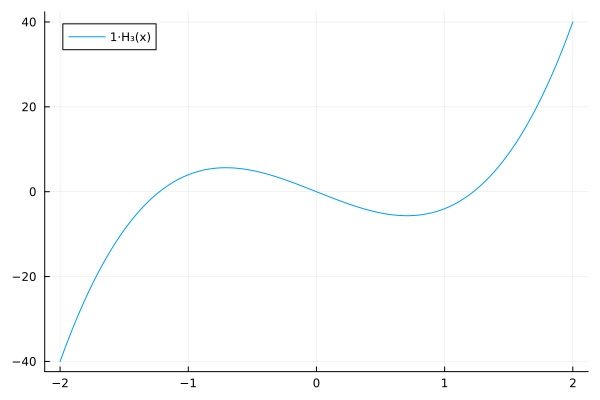

In [4]:
h3 = Hermite([0, 0, 0, 1])
plot(h3, -2, 2)

≈ªeby nie podawaƒá wektora ze wsp√≥≈Çczynnikami kolejnych stopni, mo≈ºna zrobiƒá inaczej

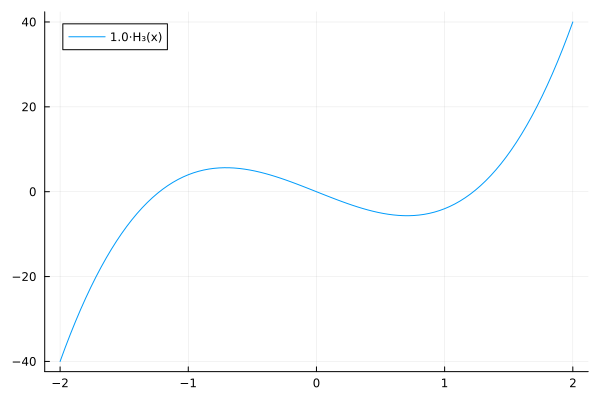

In [5]:
h4 = basis(Hermite, 3)
plot(h4, -2, 2)

### Przyk≈Çad aproksymacji

Spr√≥bujemy dokonaƒá aproksymacji zaszumionej funkcji `cos` wykorzystujƒÖc rodzinƒô wielomian√≥w ortogonalnych Hermite'a.

In [6]:
# Definicja wƒôz≈Ç√≥w
xx = -5:0.1:5
yy = cos.(xx/3 .+.2).^2 .+ rand(length(xx))/5;

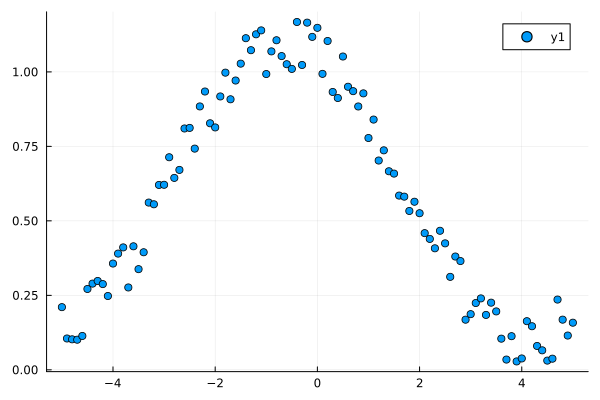

In [7]:
scatter(xx, yy, markershape=:circle)

Obliczony wektor warto≈õci normalizujemy do 1, ≈ºeby ≈Çatwiej policzyƒá wsp√≥≈Çczynniki aproksymacji (ni≈ºej obja≈õnienie dlaczego ≈Çatwiej). 

In [8]:
#przyk≈Çad prostego wektora, kt√≥ry znormalizujemy
vec=[2,2,2,2]

4-element Vector{Int64}:
 2
 2
 2
 2

In [9]:
# iloczyn skalarny = d≈Çugo≈õƒá^2
dot(vec,vec)

16

In [10]:
# normalizacja - d≈Çugo≈õƒá wektora =1
normalize(vec)

4-element Vector{Float64}:
 0.5
 0.5
 0.5
 0.5

In [11]:
# sprawdzamy d≈Çugo≈õƒá^2
dot(normalize(vec), normalize(vec))

1.0

* 0bliczamy funkcjƒô bazowƒÖ uwzglƒôdniajƒÖcƒÖ czynnik wagowy.
$<P_m,P_n>=\int_{-\infty}^{\infty} H_n(x)H_m(x)\exp(-x^2)dx 
= \int_{-\infty}^{\infty}\underbrace{H_n(x)\exp(-\frac{x^2}{2})}_{\text{funkcja bazowa}_n}\underbrace{H_m(x)\exp(-\frac{x^2}{2})}_{\text{funkcja bazowa}_m}$

* Wyliczamy jej warto≈õci dla podanych punkt√≥w x
* Otrzymany wektor warto≈õci normalizujemy


In [12]:
# obliczamy funkcjƒô bazowƒÖ
# argument 'norm'  na potrzeby wykres√≥w
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [13]:
y_2_unnorm = base_fun(2, xx, false);
y_2_norm = base_fun(2, xx);

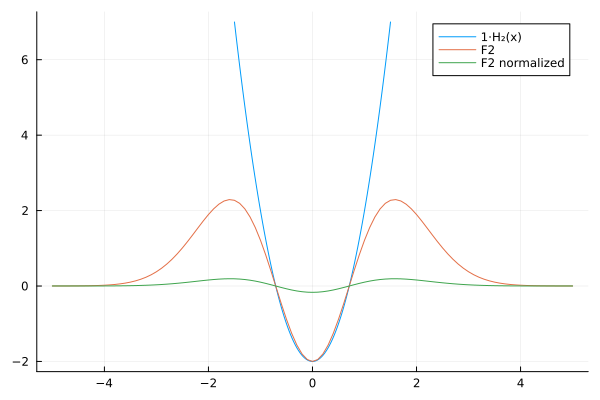

In [14]:
plot(Hermite([0, 0, 1]), -1.5, 1.5)
plot!(xx, y_2_unnorm, label="F2")
plot!(xx, y_2_norm, label="F2 normalized")

Obliczamy wektory wartosci dla punkt√≥w w xx dla kilku kolejnych funkcji bazowych

In [15]:
f0 = base_fun(0, xx, true);
f1 = base_fun(1, xx, true);
f2 = base_fun(2, xx, true);
f3 = base_fun(3, xx, true);

Sprawd≈∫my czy baza jest ortonormalna (uwaga: zamiast liczyƒá ca≈Çkƒô, sprawdzamy po prostu iloczyn skalarny wektor√≥w warto≈õci. Je≈õli warto≈õci sƒÖ wystarczajƒÖco "gƒôsto" jest do dobre przybli≈ºenie).

In [16]:
dot_base = Array{Float64, 2}(undef, 4, 4); 

for (i, f_i) in enumerate([f0, f1, f2, f3]) 
    for (j, f_j) in enumerate([f0, f1, f2, f3])
        dot_base[i,j] = dot(f_i, f_j)
    end
end

In [17]:
dot_base

4√ó4 Matrix{Float64}:
  1.0           9.17832e-18  -3.25356e-11   1.85612e-18
  9.17832e-18   1.0           1.88742e-17  -9.61163e-10
 -3.25356e-11   1.88742e-17   1.0          -7.22228e-18
  1.85612e-18  -9.61163e-10  -7.22228e-18   1.0

OK, baza jest ortonormalna

Obliczamy kolejne wsp√≥≈Çczynniki aproksymacji. Dziƒôki ortonormalnej bazie, poszczeg√≥lne wsp√≥≈Çczynniki sƒÖ iloczynami skalarnymi wektora warto≈õci funkcji aproksymowanej oraz  wektora bazowego (analogia: rzut  wektora warto≈õci funkcji aproksymowanej w kierunku wektora bazowego).

Wektor bazowy jest znormalizowany $|\vec{j}|=1$, co upraszcza obliczenia.

Analogia w 2D

$\text{rzut }\vec{a} \text{ w kierunku }  \vec{j} =|\vec{a}|\cdot cos(\angle(\vec{a},\vec{j}))=|\vec{a}|\cdot|\vec{j}|\cdot cos(\angle(\vec{a},\vec{j}))=dot(\vec{a},\vec{j})$

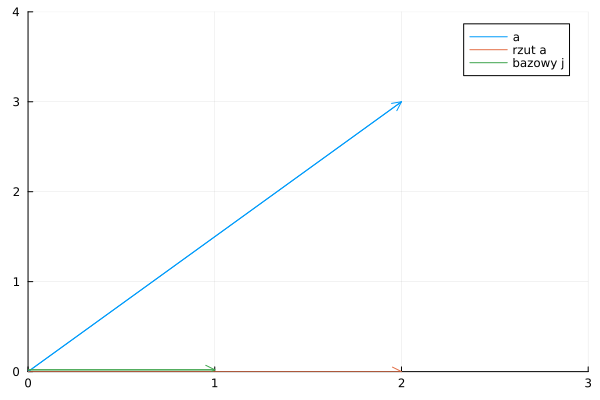

In [18]:
plot([0,2],[0,3],xrange=[0,3], yrange=[0,4],arrow=true, label="a")
plot!([0,2],[0,0],xrange=[0,3], yrange=[0,4],arrow=true, label="rzut a")
plot!([0,1],[0.02,0.02],xrange=[0,3], yrange=[0,4],arrow=true, label="bazowy j")

In [19]:
c0 = dot(yy, f0)
c1 = dot(yy, f1)
c2 = dot(yy, f2)
c3 = dot(yy, f3)
c0, c1, c2, c3

(5.753213925834425, -0.9223531363521164, 2.6783005628982433, -0.8223286258264689)

Liczymy warto≈õci aproksymowane kolejnymi stopniami

In [20]:
y_app_0 = c0*f0;
y_app_1 = c1*f1;
y_app_2 = c2*f2;
y_app_3 = c3*f3;

In [21]:
y_app_01 = y_app_0 + y_app_1;
y_app_012 = y_app_01 + y_app_2;
y_app_0123 = y_app_012 + y_app_3;

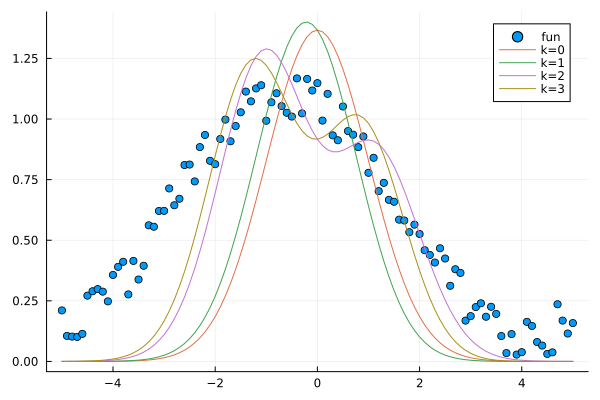

In [22]:
scatter(xx, yy, markershape=:circle, label="fun")
plot!(xx, y_app_0, label="k=0")
plot!(xx, y_app_01, label="k=1")
plot!(xx, y_app_012, label="k=2")
plot!(xx, y_app_0123, label="k=3")

Liczymy b≈Çƒôdy aproksymacji kolejnymi stopniami

In [23]:
using Statistics

In [24]:
mse(y1, y2) = mean((y1-y2).^2)

mse (generic function with 1 method)

In [25]:
mse(yy, y_app_0)

0.1340223941092733

In [26]:
mse(yy, y_app_01)

0.12559927224651501

In [27]:
mse(yy, y_app_012)

0.05457656030370594

In [28]:
mse(yy, y_app_0123)

0.04788126950854071

### EKG

Dane pochodzƒÖ z bazy https://www.physionet.org/content/mitdb/1.0.0/ .

W sygnale mo≈ºna wyr√≥≈ºniƒá wiele struktur, z kt√≥rych najbardziej charakterystycznƒÖ jest zesp√≥≈Ç QRS.

In [29]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);

In [30]:
first(ekg_data, 5)

5√ó3 DataFrame
 Row ‚îÇ time        signalN    signalV    
     ‚îÇ Float64     Float64    Float64    
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ -0.1        0.0183886  -0.0990972
   2 ‚îÇ -0.0972222  0.0145191  -0.0920442
   3 ‚îÇ -0.0944444  0.012849   -0.0831644
   4 ‚îÇ -0.0916667  0.0124946  -0.0722728
   5 ‚îÇ -0.0888889  0.0124117  -0.0593656

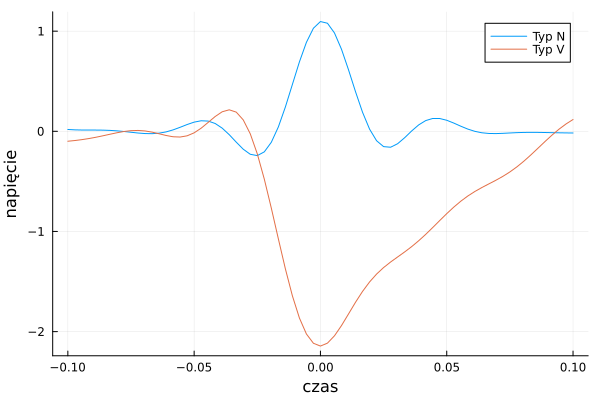

In [31]:
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napiƒôcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

(5.725113911598116, -0.9157906158817669, 2.711325477169205, -0.8018390195854078)

Uwaga: Funkcje bazowe majƒÖ pewnƒÖ "szeroko≈õƒá" i najlepiej aproksymujƒÖ inne funkcje o podobnej szeroko≈õci. Mo≈ºna dodatkowo sparametryzowaƒá f. bazowe aby by≈Çy wƒô≈ºsze i lepiej pasowa≈Çy do zespo≈Ç√≥w QRS. Na potrzeby laboratorium postƒÖpimy inaczej - przeskalujemy o≈õ X aproksymowanych sygna≈Ç√≥w.

In [32]:
# Definicja wƒôz≈Ç√≥w
xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV;

## Zadania

#### Zadanie 1 (1 pkt)

Narysowaƒá 6 pierwszych wielomian√≥w Hermita (na jednym wykresie albo siatce 2x3 lub 3x2) $H_m(x)$, $m \in \{0,1,...,5\}$

Podobnie  narysowaƒá 6 pierwszych funkcji bazowych z uwzglƒôdnieniem czynnika wagowego $H_m(x)\exp(-\frac{x^2}{2})$, $m \in \{0,1,...,5\}$

#### Zadanie 2 (1 pkt)

Pokazaƒá, ≈ºe same wielomiany nie sƒÖ ortogonane, ale ju≈º z funkcjƒÖ wagowƒÖ $exp(-x^2)$ sƒÖ. Uzyƒá metody z wektorami warto≈õci, za≈Ço≈ºyƒá pewien przedzia≈Ç.

#### Zadanie 3  (1 pkt)

Dokonaƒá aproksymacji zespo≈Çu QRS typu N oraz V za pomocƒÖ kilku kolejnych stopni. Przedstawiƒá osobno wykresy dla N i V.

#### Zadanie 4  (1 pkt)

Przedstawiƒá wykres b≈Çƒôdu aproksymacji w zale≈ºno≈õci od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia nale≈ºy u≈ºyƒá gdyby≈õmy mieli robiƒá co≈õ dalej z rezultatem aproksymacji?

#### Zadanie 1 (1 pkt)

Narysowaƒá 6 pierwszych wielomian√≥w Hermita (na jednym wykresie albo siatce 2x3 lub 3x2) $H_m(x)$, $m \in \{0,1,...,5\}$

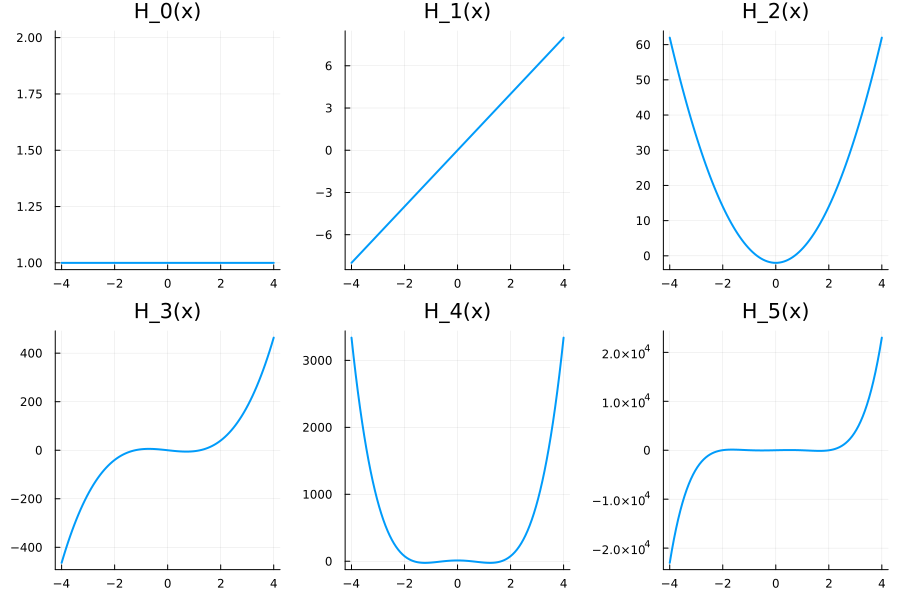

In [39]:
# Rysowanie 6 pierwszych wielomian√≥w Hermite'a
plt = plot(layout=(2,3), size=(900,600), legend=false)
for i in 0:5
    h_i = basis(Hermite, i)
    plot!(h_i, -4, 4, subplot=i+1, title="H_$i(x)", lw=2)
end
display(plt)

Podobnie narysowaƒá 6 pierwszych funkcji bazowych z uwzglƒôdnieniem czynnika wagowego $H_m(x)\exp(-\frac{x^2}{2})$, $m \in \{0,1,...,5\}$

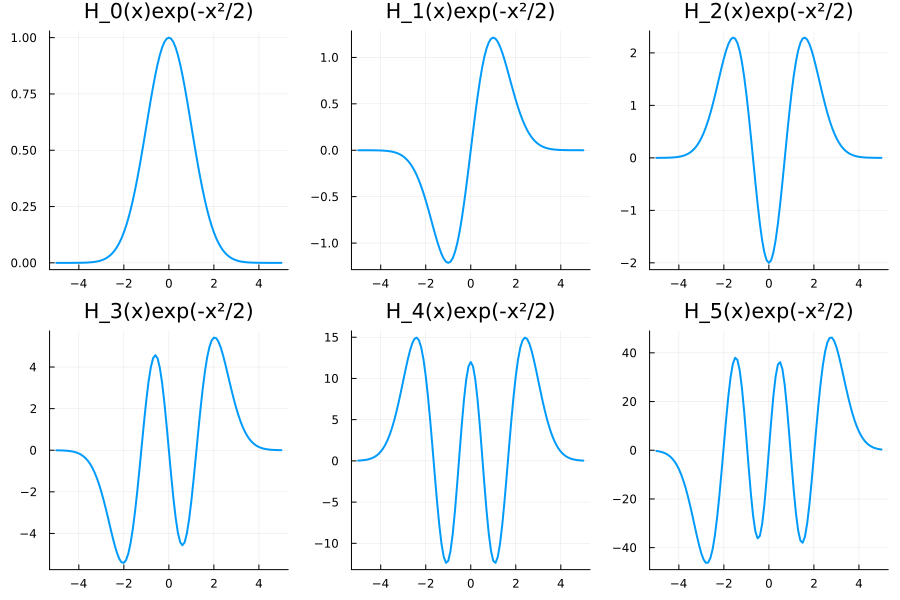

In [41]:
# Rysowanie 6 pierwszych funkcji bazowych z czynnikiem wagowym
xx_plot = -5:0.1:5
plt2 = plot(layout=(2,3), size=(900,600), legend=false)
for i in 0:5
    base_i = base_fun(i, xx_plot, false)  # Bez normalizacji
    plot!(xx_plot, base_i, subplot=i+1, title="H_$i(x)exp(-x¬≤/2)", lw=2)
end
display(plt2)

#### Zadanie 2 (1 pkt)

Pokazaƒá, ≈ºe same wielomiany nie sƒÖ ortogonane, ale ju≈º z funkcjƒÖ wagowƒÖ $exp(-x^2)$ sƒÖ. Uzyƒá metody z wektorami warto≈õci, za≈Ço≈ºyƒá pewien przedzia≈Ç.

In [49]:
# Pkg.add("PrettyTables")
using Polynomials, PrettyTables

# WystarczajƒÖco gƒôsty przedzia≈Ç
xx_test = -10:0.01:10  

# Funkcja obliczajƒÖca warto≈õci wielomian√≥w Hermite'a bez funkcji wagowej
function hermite_poly(k, x)
    H_k = basis(Hermite, k).(x)
    return H_k
end

# Obliczanie wielomian√≥w Hermite'a (stopnie 0-3)
hermites = [hermite_poly(k, xx_test) for k in 0:3]

# Obliczanie macierzy iloczyn√≥w skalarnych bez funkcji wagowej
dot_hermite = [dot(f, g) for f in hermites, g in hermites]

println("\nüìå Macierz iloczyn√≥w skalarnych dla wielomian√≥w Hermite'a BEZ funkcji wagowej:")
pretty_table(dot_hermite; formatters=ft_printf("% .5e"))

println("\n‚úÖ Brak ortogonalno≈õci")

# Funkcja bazowa z wagƒÖ exp(-x^2) ‚Äì zak≈Çadam, ≈ºe masz base_fun(k, x, false) zdefiniowane
funs_weighted = [base_fun(k, xx_test, false) for k in 0:3]

# Macierz iloczyn√≥w skalarnych z funkcjƒÖ wagowƒÖ
dot_weighted = [dot(f, g) for f in funs_weighted, g in funs_weighted]

println("\nüìå Macierz iloczyn√≥w skalarnych z funkcjƒÖ wagowƒÖ exp(-x¬≤):")
pretty_table(dot_weighted; formatters=ft_printf("% .5e"))

println("\n‚úÖ Diagnonalne elementy dodatnie i rosnace, pozadiagonalne bliskie zeru - Silna numeryczna ortogonalno≈õƒá")

# Znormalizowana macierz ‚Äì przez d≈Çugo≈õci wektor√≥w
norms = sqrt.(diag(dot_weighted))
normalized = dot_weighted ./ (norms * norms')

println("\nüìå Znormalizowana macierz (powinna byƒá bliska jednostkowej):")
pretty_table(normalized; formatters=ft_printf("% .3f"))

# Sprawdzenie ortogonalno≈õci
is_orthonormal = all(abs.(normalized .- I(4)) .< 1e-2)
println("\n‚úÖ Czy z wagƒÖ sƒÖ ortonormalne? ", is_orthonormal)



üìå Macierz iloczyn√≥w skalarnych dla wielomian√≥w Hermite'a BEZ funkcji wagowej:
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ       Col. 1 ‚îÇ       Col. 2 ‚îÇ       Col. 3 ‚îÇ       Col. 4 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ  2.00100e+03 ‚îÇ -2.66454e-13 ‚îÇ  2.63065e+05 ‚îÇ -2.09184e-11 ‚îÇ
‚îÇ -2.66454e-13 ‚îÇ  2.67067e+05 ‚îÇ  2.81943e-11 ‚îÇ  6.25577e+07 ‚îÇ
‚îÇ  2.63065e+05 ‚îÇ  2.81943e-11 ‚îÇ  6.30998e+07 ‚îÇ -3.11993e-08 ‚îÇ
‚îÇ -2.09184e-11 ‚îÇ  6.25577e+07 ‚îÇ -3.11993e-08 ‚îÇ  1.75895e+10 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

‚úÖ

#### Zadanie 3 (1 pkt)

Dokonaƒá aproksymacji zespo≈Çu QRS typu N oraz V za pomocƒÖ kilku kolejnych stopni. Przedstawiƒá osobno wykresy dla N i V.

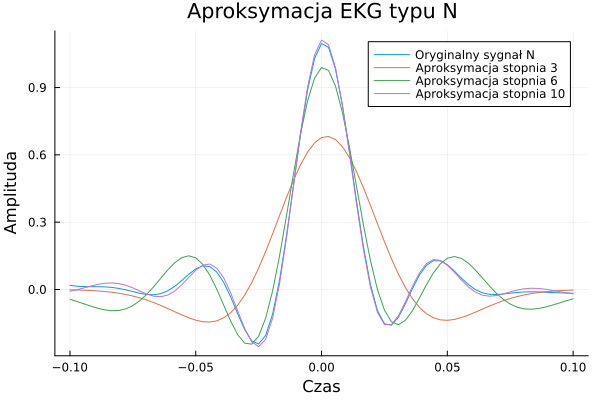

In [36]:
# Funkcja do aproksymacji sygna≈Çu EKG z wykorzystaniem wielomian√≥w Hermite'a
function approximate_ecg(xx, yy, max_degree)
    # Inicjalizacja wektora do przechowywania aproksymacji
    approx = zeros(length(xx))
    
    # Obliczanie wsp√≥≈Çczynnik√≥w i sumowanie kolejnych aproksymacji
    for k in 0:max_degree
        f_k = base_fun(k, xx)
        c_k = dot(yy, f_k)
        approx += c_k * f_k
    end
    
    return approx
end

# Przygotowanie danych dla typu N
xx_ekgN = ekg_data.time * 40
yy_ekgN = ekg_data.signalN

# Aproksymacja EKG typu N dla r√≥≈ºnych stopni wielomianu
approx_N_3 = approximate_ecg(xx_ekgN, yy_ekgN, 3)
approx_N_6 = approximate_ecg(xx_ekgN, yy_ekgN, 6)
approx_N_10 = approximate_ecg(xx_ekgN, yy_ekgN, 10)

# Wykres aproksymacji EKG typu N
plot(ekg_data.time, yy_ekgN, label="Oryginalny sygna≈Ç N", xlabel="Czas", ylabel="Amplituda", title="Aproksymacja EKG typu N")
plot!(ekg_data.time, approx_N_3, label="Aproksymacja stopnia 3")
plot!(ekg_data.time, approx_N_6, label="Aproksymacja stopnia 6")
plot!(ekg_data.time, approx_N_10, label="Aproksymacja stopnia 10")

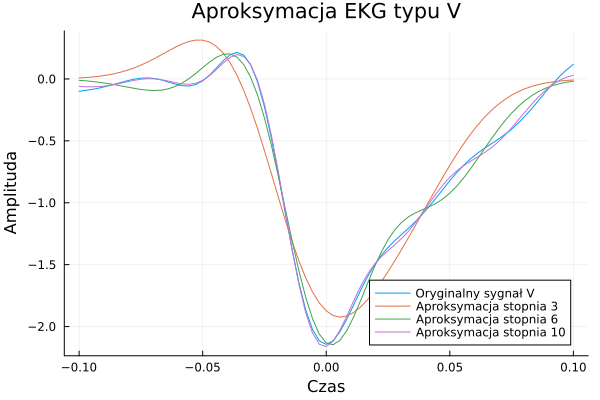

In [37]:
# Aproksymacja EKG typu V dla r√≥≈ºnych stopni wielomianu
approx_V_3 = approximate_ecg(xx_ekg, yy_ekgV, 3)
approx_V_6 = approximate_ecg(xx_ekg, yy_ekgV, 6)
approx_V_10 = approximate_ecg(xx_ekg, yy_ekgV, 10)

# Wykres aproksymacji EKG typu V
plot(ekg_data.time, yy_ekgV, label="Oryginalny sygna≈Ç V", xlabel="Czas", ylabel="Amplituda", title="Aproksymacja EKG typu V")
plot!(ekg_data.time, approx_V_3, label="Aproksymacja stopnia 3")
plot!(ekg_data.time, approx_V_6, label="Aproksymacja stopnia 6")
plot!(ekg_data.time, approx_V_10, label="Aproksymacja stopnia 10")

#### Zadanie 4 (1 pkt)

Przedstawiƒá wykres b≈Çƒôdu aproksymacji w zale≈ºno≈õci od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia nale≈ºy u≈ºyƒá gdyby≈õmy mieli robiƒá co≈õ dalej z rezultatem aproksymacji?

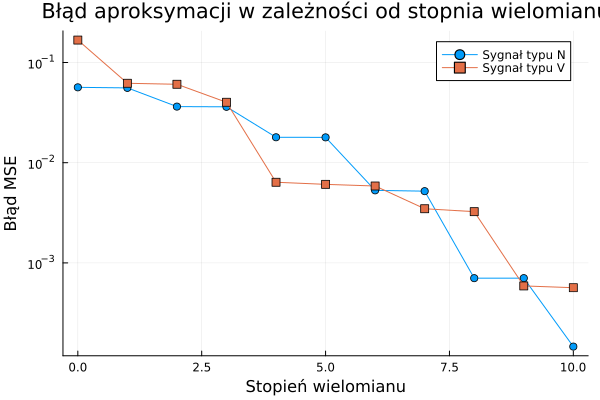

B≈Çƒôdy MSE dla sygna≈Çu typu N:
Stopie≈Ñ 0: 0.05653083118425804
Stopie≈Ñ 1: 0.055816908933032455
Stopie≈Ñ 2: 0.03630893116640521
Stopie≈Ñ 3: 0.0361317602745503
Stopie≈Ñ 4: 0.017944119544999304
Stopie≈Ñ 5: 0.017906033228894835
Stopie≈Ñ 6: 0.00529813900848142
Stopie≈Ñ 7: 0.00520028825331861
Stopie≈Ñ 8: 0.000704073888372569
Stopie≈Ñ 9: 0.0007045246082865523
Stopie≈Ñ 10: 0.0001460905557721477

B≈Çƒôdy MSE dla sygna≈Çu typu V:
Stopie≈Ñ 0: 0.1675380359890898
Stopie≈Ñ 1: 0.06205879347269694
Stopie≈Ñ 2: 0.060652867414550976
Stopie≈Ñ 3: 0.04008843785445875
Stopie≈Ñ 4: 0.006383463796395045
Stopie≈Ñ 5: 0.006081291954185556
Stopie≈Ñ 6: 0.005854964251436245
Stopie≈Ñ 7: 0.003471290140341321
Stopie≈Ñ 8: 0.0032469317824282587
Stopie≈Ñ 9: 0.0005892396935529139
Stopie≈Ñ 10: 0.0005655614018863204

Optymalny stopie≈Ñ wielomianu dla sygna≈Çu N: 10
Optymalny stopie≈Ñ wielomianu dla sygna≈Çu V: 10

Praktyczny stopie≈Ñ wielomianu dla sygna≈Çu N (przy progu 1% poprawy b≈Çƒôdu): 2
Praktyczny stopie≈Ñ wielomian

In [51]:
# Funkcja obliczajƒÖca b≈ÇƒÖd ≈õredniokwadratowy (MSE) dla danego stopnia aproksymacji
function calculate_mse_for_degree(xx, yy, degree)
    approx = approximate_ecg(xx, yy, degree)
    return mse(yy, approx)
end

# Obliczanie b≈Çƒôd√≥w dla r√≥≈ºnych stopni aproksymacji (0-10) dla sygna≈Çu typu N
degrees = 0:10
mse_N = [calculate_mse_for_degree(xx_ekgN, yy_ekgN, degree) for degree in degrees]
mse_V = [calculate_mse_for_degree(xx_ekg, yy_ekgV, degree) for degree in degrees]

# Wykres b≈Çƒôd√≥w MSE w zale≈ºno≈õci od stopnia wielomianu
plt = plot(degrees, mse_N, label="Sygna≈Ç typu N", marker=:circle, linestyle=:solid, 
     xlabel="Stopie≈Ñ wielomianu", ylabel="B≈ÇƒÖd MSE", title="B≈ÇƒÖd aproksymacji w zale≈ºno≈õci od stopnia wielomianu",
     yscale=:log10)
plot!(degrees, mse_V, label="Sygna≈Ç typu V", marker=:square, linestyle=:solid)
display(plt)

# Wy≈õwietlenie tabeli z warto≈õciami MSE
println("B≈Çƒôdy MSE dla sygna≈Çu typu N:")
for (degree, error) in zip(degrees, mse_N)
    println("Stopie≈Ñ $degree: $error")
end

println("\nB≈Çƒôdy MSE dla sygna≈Çu typu V:")
for (degree, error) in zip(degrees, mse_V)
    println("Stopie≈Ñ $degree: $error")
end

# Analiza optymalnego stopnia wielomianu
_, optimal_degree_N = findmin(mse_N)
_, optimal_degree_V = findmin(mse_V)
optimal_degree_N -= 1  # Korekta indeksu (degrees zaczyna siƒô od 0)
optimal_degree_V -= 1

println("\nOptymalny stopie≈Ñ wielomianu dla sygna≈Çu N: $optimal_degree_N")
println("Optymalny stopie≈Ñ wielomianu dla sygna≈Çu V: $optimal_degree_V")

# Analiza kompromisu miƒôdzy dok≈Çadno≈õciƒÖ a z≈Ço≈ºono≈õciƒÖ
threshold = 0.01  # 1% poprawa b≈Çƒôdu
practical_degree_N = 0
practical_degree_V = 0

for i in 1:length(mse_N)-1
    improvement = (mse_N[i] - mse_N[i+1]) / mse_N[i]
    if improvement < threshold
        practical_degree_N = i-1
        break
    end
end

for i in 1:length(mse_V)-1
    improvement = (mse_V[i] - mse_V[i+1]) / mse_V[i]
    if improvement < threshold
        practical_degree_V = i-1
        break
    end
end

println("\nPraktyczny stopie≈Ñ wielomianu dla sygna≈Çu N (przy progu 1% poprawy b≈Çƒôdu): $practical_degree_N")
println("Praktyczny stopie≈Ñ wielomianu dla sygna≈Çu V (przy progu 1% poprawy b≈Çƒôdu): $practical_degree_V")

AnalizujƒÖc wyniki b≈Çƒôdu aproksymacji, mo≈ºna zaobserwowaƒá, ≈ºe dla obu typ√≥w sygna≈Ç√≥w EKG (N i V) b≈ÇƒÖd MSE znaczƒÖco spada przy zwiƒôkszaniu stopnia wielomianu do oko≈Ço 6-8. Powy≈ºej tego stopnia poprawa jako≈õci aproksymacji jest ju≈º niewielka.

BiorƒÖc pod uwagƒô kompromis miƒôdzy dok≈Çadno≈õciƒÖ a z≈Ço≈ºono≈õciƒÖ obliczeniowƒÖ, optymalny stopie≈Ñ wielomianu dla zastosowa≈Ñ praktycznych wynosi oko≈Ço 7-8 dla obu typ√≥w sygna≈Ç√≥w. Ten stopie≈Ñ zapewnia dobrƒÖ jako≈õƒá odwzorowania charakterystycznych cech sygna≈Çu EKG, takich jak zesp√≥≈Ç QRS, przy rozsƒÖdnej z≈Ço≈ºono≈õci obliczeniowej.

Dla dalszego przetwarzania sygna≈Çu, np. w systemach klasyfikacji arytmii, taki stopie≈Ñ wielomianu pozwala zachowaƒá istotne cechy diagnostyczne sygna≈Çu przy jednoczesnym usuniƒôciu szum√≥w i artefakt√≥w.